#Insurance Claims Charges Prediction

Download dataset

##STEP-1: Importing Libraries & Data Set

In [47]:
# Importing basic libraries for data analysis and visualization
import numpy as np  # NumPy is used for numerical operations on arrays and matrices

import pandas as pd  # Pandas is used for data manipulation and analysis

import matplotlib.pyplot as plt  # Matplotlib is a plotting library for creating visualizations

import seaborn as sns  # Seaborn is a statistical data visualization library based on Matplotlib, providing a high-level interface for drawing attractive and informative statistical graphics


In [48]:
# Downloading the data from the provided URL and saving it as "insurance.csv"
!wget https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv

# Reading the downloaded data into a DataFrame called 'df'
df = pd.read_csv("insurance.csv")



--2023-12-06 16:49:10--  https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55628 (54K) [text/plain]
Saving to: ‘insurance.csv.2’

insurance.csv.2     100%[===================>]  54.32K  --.-KB/s    in 0.01s   

2023-12-06 16:49:10 (4.29 MB/s) - ‘insurance.csv.2’ saved [55628/55628]



##STEP-2:Exploratory Data Analysis (EDA)

In [49]:
# Displaying descriptive statistics of the DataFrame 'df'
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [50]:
# Displaying the shape of the DataFrame 'df'
df.shape


(1338, 7)

In [40]:
# Generating summary statistics of the numerical columns in the DataFrame 'df'
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [41]:
# Checking for null (missing) values in the DataFrame 'df' and counting them
df.isnull().value_counts()



age    sex    bmi    children  smoker  region  charges
False  False  False  False     False   False   False      1338
dtype: int64

Visulizations

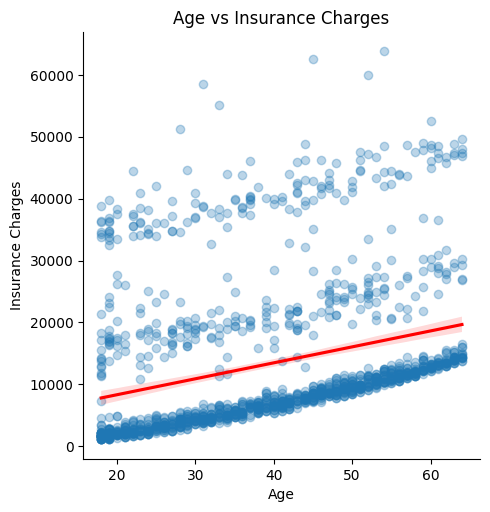

In [51]:
# Creating a scatter plot with a regression line to visualize the relationship between 'age' and 'charges'
import seaborn as sns
import matplotlib.pyplot as plt

# Using lmplot from Seaborn to create a scatter plot with a regression line
sns.lmplot(x='age', y='charges', data=df, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})

# Adding title and labels to the plot
plt.title('Age vs Insurance Charges')
plt.xlabel('Age')
plt.ylabel('Insurance Charges')

# Displaying the plot
plt.show()


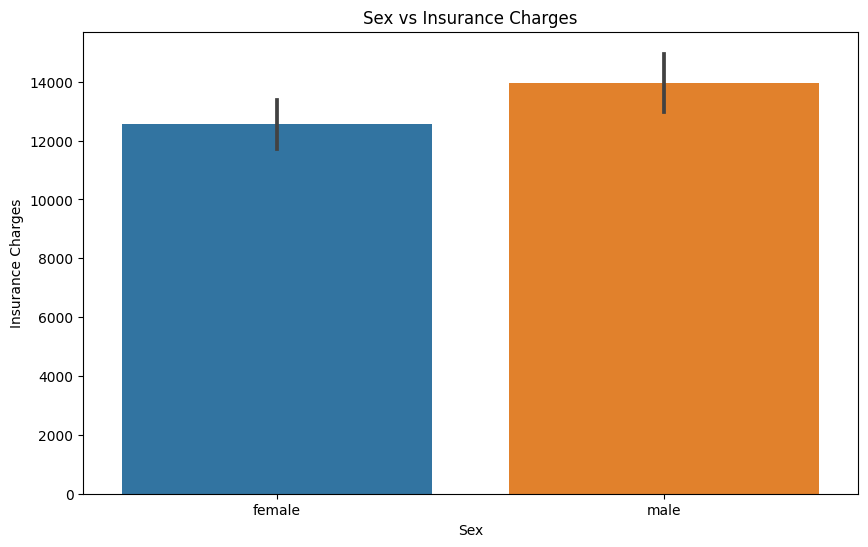

In [52]:
# Creating a bar plot to compare 'sex' and 'charges' columns
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the figure size
plt.figure(figsize=(10, 6))

# Using barplot from Seaborn to compare average insurance charges between genders
sns.barplot(x='sex', y='charges', data=df)

# Adding title and labels to the plot
plt.title('Sex vs Insurance Charges')
plt.xlabel('Sex')
plt.ylabel('Insurance Charges')

# Displaying the plot
plt.show()


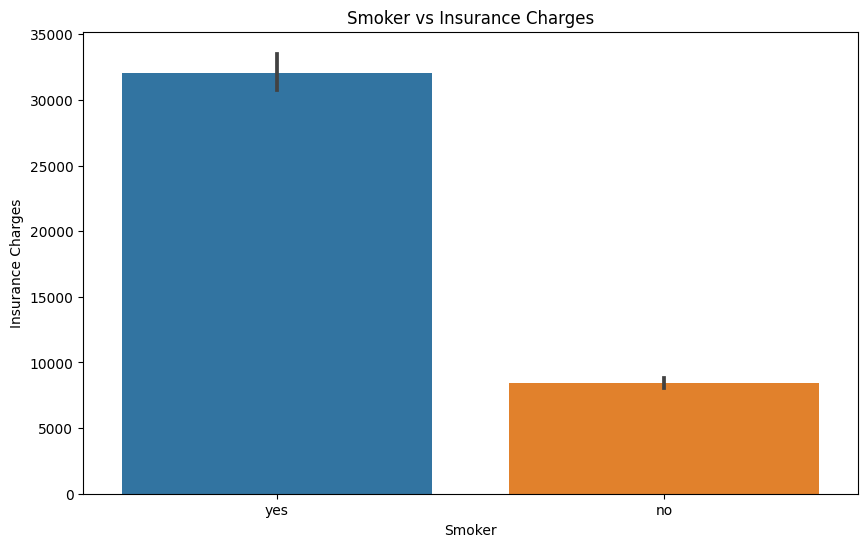

In [53]:
# Creating a bar plot to compare 'smoker' and 'charges' columns
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the figure size
plt.figure(figsize=(10, 6))

# Using barplot from Seaborn to compare average insurance charges between smokers and non-smokers
sns.barplot(x='smoker', y='charges', data=df)

# Adding title and labels to the plot
plt.title('Smoker vs Insurance Charges')
plt.xlabel('Smoker')
plt.ylabel('Insurance Charges')

# Displaying the plot
plt.show()



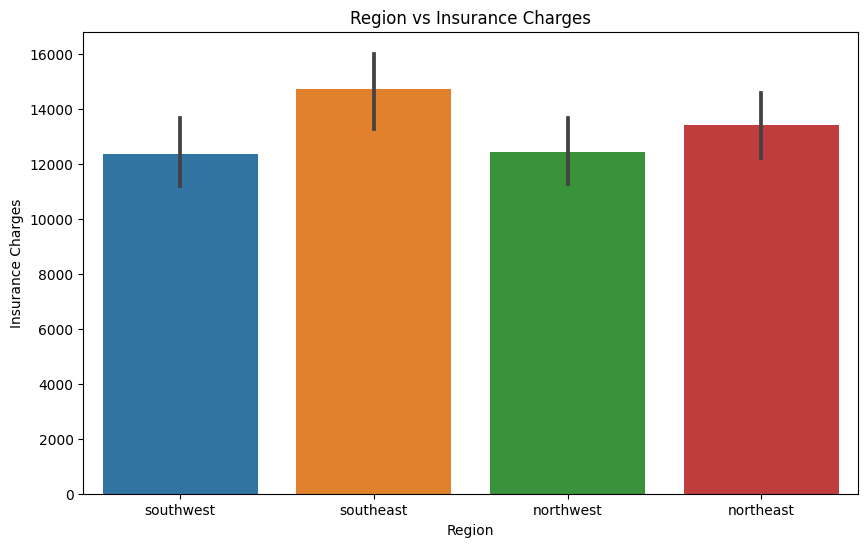

In [54]:
# Creating a bar plot to compare 'region' and 'charges' columns
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the figure size
plt.figure(figsize=(10, 6))

# Using barplot from Seaborn to compare average insurance charges among different regions
sns.barplot(x='region', y='charges', data=df)

# Adding title and labels to the plot
plt.title('Region vs Insurance Charges')
plt.xlabel('Region')
plt.ylabel('Insurance Charges')

# Displaying the plot
plt.show()



<ipython-input-55-ab912363dd35>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


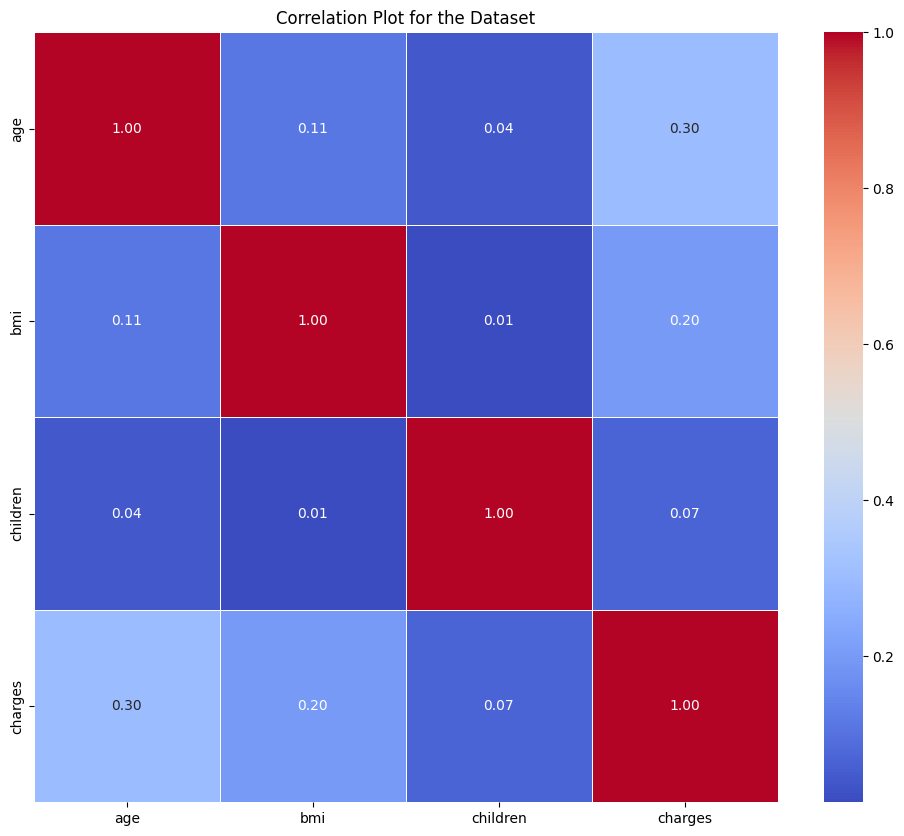

In [55]:
# Plotting a correlation matrix heatmap for the dataset
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame with numerical columns
# Replace this with your actual DataFrame or read your data from a file

# Compute the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap with the correlation values
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title
plt.title('Correlation Plot for the Dataset')

# Show the plot
plt.show()




##STEP-3:Data Preprocessing / Clean the Data


In [57]:
# Label Encoding for 'sex', 'smoker', and 'region' columns
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to 'sex', 'smoker', and 'region' columns and create new encoded columns
df['sex_encoded'] = label_encoder.fit_transform(df['sex'])
df['smoker_encoded'] = label_encoder.fit_transform(df['smoker'])
df['region_encoded'] = label_encoder.fit_transform(df['region'])

# Display the updated DataFrame showing original and encoded columns
print(df[['sex', 'sex_encoded', 'smoker', 'smoker_encoded', 'region', 'region_encoded']])


         sex  sex_encoded smoker  smoker_encoded     region  region_encoded
0     female            0    yes               1  southwest               3
1       male            1     no               0  southeast               2
2       male            1     no               0  southeast               2
3       male            1     no               0  northwest               1
4       male            1     no               0  northwest               1
...      ...          ...    ...             ...        ...             ...
1333    male            1     no               0  northwest               1
1334  female            0     no               0  northeast               0
1335  female            0     no               0  southeast               2
1336  female            0     no               0  southwest               3
1337  female            0    yes               1  northwest               1

[1338 rows x 6 columns]


In [58]:
# Removing unnecessary columns from the dataset
# Replace this with your actual DataFrame or read your data from a file

# List of unnecessary columns
unnecessary_columns = ['sex', 'smoker', 'region']

# Drop the unnecessary columns
df = df.drop(columns=unnecessary_columns)

# Display the updated DataFrame
print(df.head())


   age     bmi  children      charges  sex_encoded  smoker_encoded  \
0   19  27.900         0  16884.92400            0               1   
1   18  33.770         1   1725.55230            1               0   
2   28  33.000         3   4449.46200            1               0   
3   33  22.705         0  21984.47061            1               0   
4   32  28.880         0   3866.85520            1               0   

   region_encoded  
0               3  
1               2  
2               2  
3               1  
4               1  


In [60]:
#Selecting Independent (Features) & Dependent(Target) variables
# Replace this with your actual DataFrame or read your data from a file

# Independent variables (features)
X = df[['age', 'sex_encoded', 'bmi', 'children', 'smoker_encoded', 'region_encoded']]

# Dependent variable (target)
y = df['charges']

# Display the selected variables
print("Independent variables:")
print(X.head())

print("\nDependent variable:")
print(y.head())

Independent variables:
   age  sex_encoded     bmi  children  smoker_encoded  region_encoded
0   19            0  27.900         0               1               3
1   18            1  33.770         1               0               2
2   28            1  33.000         3               0               2
3   33            1  22.705         0               0               1
4   32            1  28.880         0               0               1

Dependent variable:
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


Splitting the dataset into the Training set and Test set

In [25]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your independent and dependent variables, respectively
# Replace this with your actual feature matrix (X) and target variable (y)

# Split the dataset into a training set and a test set (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1070, 6)
Shape of X_test: (268, 6)
Shape of y_train: (1070,)
Shape of y_test: (268,)


##STEP-4 : Fit the Model & Predict , check the Accuracy

##Linear Regression

In [61]:
# Creating the model, feeding the training data, predicting the test set results, and evaluating performance
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

# Assuming X, y are your features and target variables
# Replace these with your actual features and target variables

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Check accuracy (you can use different metrics based on your problem)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Alternatively, you can use cross-validation to get a more robust estimate of performance
cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation

# Display the results
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Cross-Validation Scores:", cv_scores)

Mean Squared Error: 33635210.431178406
R-squared: 0.7833463107364539
Cross-Validation Scores: [0.76123983 0.70838663 0.77786772 0.73365206 0.7551335 ]


##Support Vector Machine

In [62]:
# Using Support Vector Regression (SVR) for modeling and evaluation
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature matrix and target variable, respectively
# Replace these with your actual feature matrix (X) and target variable (y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Support Vector Regression model with a linear kernel
model = SVR(kernel='linear')  # You can choose different kernels (linear, rbf, poly, etc.)

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = model.predict(X_test_scaled)

# Check accuracy (you can use different metrics based on your problem)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Alternatively, you can use cross-validation to get a more robust estimate of performance
cv_scores = cross_val_score(model, scaler.transform(X), y, cv=5)  # 5-fold cross-validation

# Display the results
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Cross-Validation Scores:", cv_scores)


Mean Squared Error: 152222234.61327475
R-squared: 0.019494503107480132
Cross-Validation Scores: [-0.02647758 -0.01279151  0.00694885 -0.015622   -0.02979884]


##Decision Tree

In [63]:
# Creating the model, feeding the training data, predicting the test set results, and evaluating performance
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature matrix and target variable, respectively
# Replace these with your actual feature matrix (X) and target variable (y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Check accuracy (you can use different metrics based on your problem)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Alternatively, you can use cross-validation to get a more robust estimate of performance
cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation

# Display the results
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Cross-Validation Scores:", cv_scores)


Mean Squared Error: 49003243.60682007
R-squared: 0.6843565603663775
Cross-Validation Scores: [0.77017598 0.69770663 0.72182666 0.73085096 0.67896182]


##Random Forest

In [64]:
# Creating the model, feeding the training data, predicting the test set results, and evaluating performance
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature matrix and target variable, respectively
# Replace these with your actual feature matrix (X) and target variable (y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model with 100 trees
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Check accuracy (you can use different metrics based on your problem)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Alternatively, you can use cross-validation to get a more robust estimate of performance
cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-vali


Compare and evaluate the Model results and find the best model

In [65]:
# Model evaluation using cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Assuming X and y are your feature matrix and target variable, respectively
# Replace these with your actual feature matrix (X) and target variable (y)

# List of models to evaluate
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('Support Vector Machine', SVR(kernel='linear'))
]

# Evaluate each model using cross-validation
for model_name, model in models:
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    avg_mse = -cv_scores.mean()  # Take the negative because cross_val_score returns neg_mean_squared_error
    print(f"{model_name} - Average MSE: {avg_mse}")

# Choose the model with the lowest average MSE as the best model


Linear Regression - Average MSE: 36862396.258872904
Decision Tree - Average MSE: 40904179.07225384
Random Forest - Average MSE: 23770090.07483476
Support Vector Machine - Average MSE: 166543821.6187899
